# Neural Networks and Machine Learning

## 1 - Loading the data

-- We will use the Covertype dataset. You can read more about the dataset here: https://scikit-learn.org/stable/datasets/real_world.html#covtype-dataset and https://archive.ics.uci.edu/ml/datasets/Covertype. 

-- You need to download the data before you can get started. Download from https://archive.ics.uci.edu/ml/datasets/Covertype.

-- You would then have downloaded a *covtype.data.gz* file. Unzip this, e.g. using the free 7Zip software for those using Windows.

-- The data file in the unzipped folder would be *covtype.data* which can be opened with any text editor. Use the file menu in Google Colab to upload the file to your Colab directory. Once upload is complete, you should be able to see the file on the listed contents of your Colab directory.

-- You can now load the data from the *covtype.data* file.

LOADING THE DATA FROM FILE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy


!ls  /content

#data_file_full_path = "/content/covtype.data"
# change the file path according to your file location.
data_file_full_path = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/week3/covtype.data"

covtype_data_as_list = []

# load the dataset
with open(data_file_full_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    for row in csv_reader:

      covtype_data_as_list.append([float(val) for val in row])


covtype_data = numpy.array(covtype_data_as_list)


print("\n The dataset has shape: "+str(covtype_data.shape))


# get the features and the labels
feat_col = numpy.arange(0, 54)
label_col = 54

cov_type_feats = covtype_data[:, feat_col]
cov_type_labels = covtype_data[:, label_col]

print("\n A peek at the dataset features: \n"+str(cov_type_feats))
print("\n A peek at the dataset labels: \n"+str(cov_type_labels))


drive  sample_data

 The dataset has shape: (581012, 55)

 A peek at the dataset features: 
[[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]

 A peek at the dataset labels: 
[5. 5. 2. ... 3. 3. 3.]


## 2 - Exploring the data

After you load the data, you should explore the data. Remember the importance of exploring and understanding the data? You could, for example, look at relationships between each individual feature and the labels, e.g. using scatter plots or boxplots with the *matplotlib* library (https://matplotlib.org/stable/api/index.html). 


EXPLORING THE DATASET


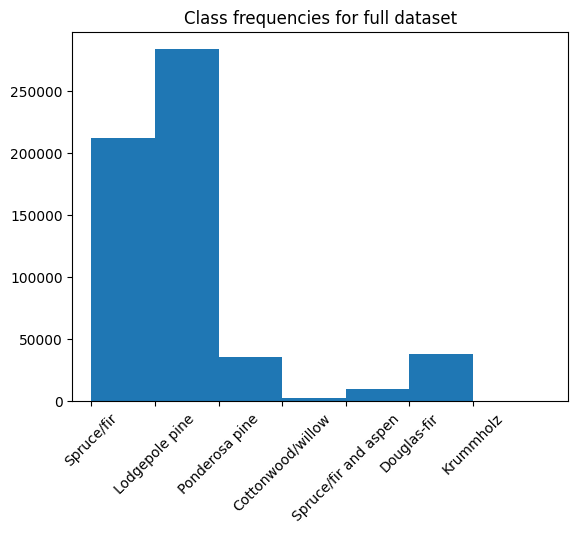

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# set random seed for reproducibility
random_seed = 1

cover_types = ['Spruce/fir', 'Lodgepole pine', 'Ponderosa pine', 
               'Cottonwood/willow', 'Spruce/fir and aspen', 'Douglas-fir', 
               'Krummholz']


def cover_type_distr_plot(plot_data, plot_label):
  plt.figure()
  _, _, _ = plt.hist(plot_data, bins=numpy.unique(cov_type_labels), align='left')
  plt.title(plot_label)
  plt.xticks(numpy.unique(cov_type_labels)-0.5, cover_types, rotation=45)
  plt.xlim(right=max(numpy.unique(cov_type_labels))+1)
  plt.show()
  print('\n')

# Plot the frequencies of each class in the labels
cover_type_distr_plot(cov_type_labels, 'Class frequencies for full dataset')


## 3 - Splitting into training, validation, and test sets

You should split the data into training, validation, and test sets. Remember that we build the model using the training set, use the validation set to select the optimal values for the hyperparameters that we decide to optimize, then finally evaluate the model with these hyperparameter settings using the test set.

SPLITTING THE DATASET

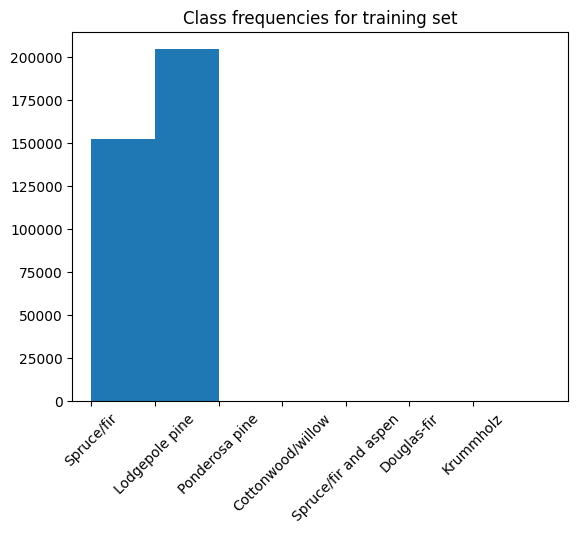

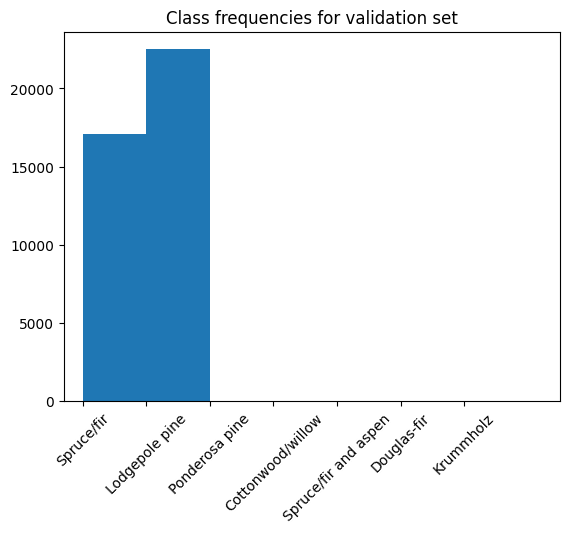

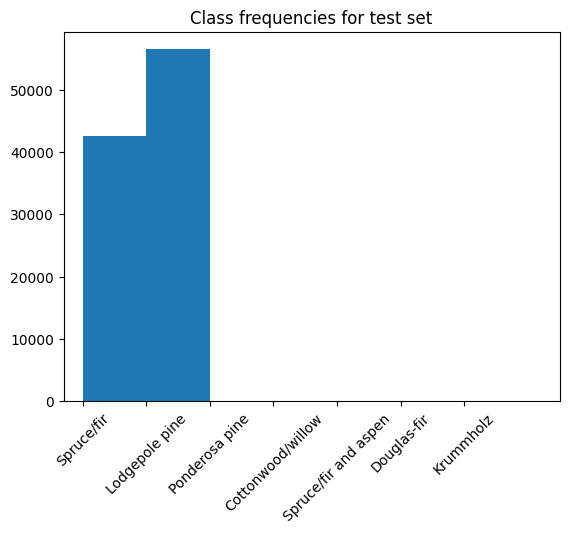

In [ ]:
from sklearn.model_selection import train_test_split



# Let's only consider data with class labels '1' and '2' in the first instance
all_ids = numpy.arange(0, cov_type_feats.shape[0])
sub_ids = all_ids[cov_type_labels<3]
cov_type_labels_sub = cov_type_labels[sub_ids]
cov_type_feats_sub = cov_type_feats[sub_ids, :]


# First randomly split the data 80/20 into training and test sets
all_ids_sub = numpy.arange(0, cov_type_feats_sub.shape[0])
train_set_ids, test_set_ids = train_test_split(all_ids_sub, test_size=0.2, train_size=0.8, 
                                 random_state=random_seed, shuffle=True)


# Then further split the training set into training and validation sets
train_set_ids, val_set_ids = train_test_split(train_set_ids, test_size=0.1, train_size=0.9, 
                                 random_state=random_seed, shuffle=True)



# Show the distribution of the labels in the final training, validation, and test sets
cover_type_distr_plot(cov_type_labels_sub[train_set_ids], 'Class frequencies for training set')
cover_type_distr_plot(cov_type_labels_sub[val_set_ids], 'Class frequencies for validation set')
cover_type_distr_plot(cov_type_labels_sub[test_set_ids], 'Class frequencies for test set')



## 4 - Preprocessing

Before going into the modelling, you may need to preprocess your data. You should at least normalise (i.e. scale) your feature vector.


In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_feats(feat_vec):
  # Scaling the features to the same range of values
  scaler = StandardScaler()
  scaler.fit(feat_vec)
  scaled_feat_vec = scaler.transform(feat_vec)
  print("\n A peek at the scaled dataset features: \n"+str(scaled_feat_vec))

  return scaled_feat_vec


scaled_cov_type_feats_sub = scale_feats(cov_type_feats_sub)




 A peek at the scaled dataset features: 
[[-1.01473463 -0.13263318 -0.62547778 ... -0.13963057 -0.13008981
  -0.10260066]
 [-1.10841682  0.01070451  0.66288101 ... -0.13963057 -0.13008981
  -0.10260066]
 [-2.12412904 -0.19534342 -1.05493071 ... -0.13963057 -0.13008981
  -0.10260066]
 ...
 [-1.96141786 -1.2255831  -0.05287387 ... -0.13963057 -0.13008981
  -0.10260066]
 [-1.97127914 -1.23454171  0.0902771  ... -0.13963057 -0.13008981
  -0.10260066]
 [-1.98114042 -1.17183147  0.0902771  ... -0.13963057 -0.13008981
  -0.10260066]]


## 5 - Modelling with Multilayer Perceptrons

### **Multilayer Perceptron - Using the original feature vector scaled**


Still using a three-layer multilayer perceptron, i.e. a neural network that has 3 fully connected layers, with the following specifications:

*   Input size: the number of features
*   Hidden layer sizes: 100 units for each of the two hidden layers 
*   Output size: the number of label classes
*   Activation functions: linear activation for the two hidden layers and a softmax activation for the output layer

with the code refactored slightly for elegance and efficiency.

METHODS & FUNCTIONS & IMPORTS

In [ ]:
# Multilayer Perceptron

import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
torch.manual_seed(random_seed)


# Create your network class
class three_layer_MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = torch.sigmoid):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.hidden_l1(inputs)
        x = self.hidden_l2(x)
        x = self.output_l3(x)
        x = self.activation_fn(x)
        return x


# You can create a method for computing performance metrics of interest
def my_metrics(labels, predictions):
    
    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted

    predictions_numpy = predictions.detach().numpy()
    predicted_classes = numpy.argmax(predictions_numpy, axis=1)


    avg_f1_score = f1_score(labels, predicted_classes, average='macro')
    acc = accuracy_score(labels, predicted_classes)



    return avg_f1_score, acc


def train_model(model, learning_rate, epochs, train_dataloader, val_dataloader):

  # The optimizer we'll use to update the model parameters
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # Compute the loss against the training labels using the nn.CrossEntropyLoss class 
  # The cross entropy loss for Pytorch softmax activation of the output with
  # and cross entropy so we could have done without having the softmax activation
  # in our output layer (this is not necessarily the case for libraries such as TensorFlow).
  loss_function = nn.CrossEntropyLoss()

  # Set the model to training mode
  model.train()

  best_model_acc = 0
  losses = []

  # Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
  # is called an epoch.
  for epoch in range(0, num_epochs):


      if epoch == 0:  best_model = deepcopy(model)


      for batch, (X_train, y_train) in enumerate(train_dataloader):


        # Then the value of loss function 
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
      
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)
    


        # We need to zero out the `.grad` buffers as otherwise on the backward pass we'll add the 
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Compute the model parameters' gradients 
        # and propagate the loss backwards through the network.
        train_loss.backward()

        # Now we update the model parameters using those gradients
        optimizer.step()

      for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

      if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

      # How well the network does on the batch is an indication of how well training is 
      # progressing
      print("epoch: {} - train loss: {:5.5f} train acc: {:2.2f} val loss: {:5.5f} val acc: {:2.2f}".format(
          epoch,
          train_loss.item(),
          train_acc,
          val_loss.item(),
          val_acc

      ))

      losses.append([train_loss.item(), val_loss.item()])


      
      
  model = best_model

  return model, losses


def evaluate_model(model, losses, test_dataloader, label_list):

  # Finally we can test our model on the test set and get an estimate of its performance. 
  # First set the model to evaluation mode 
  model.eval()  
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)    
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    test_f1_scores = f1_score(y_test, numpy.argmax(test_pred_numpy, axis=1), average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


    print("\n Confusion matrix:")
    confusion_mat = confusion_matrix(y_test, numpy.argmax(test_pred_numpy, axis=1))
    disp = ConfusionMatrixDisplay(confusion_mat, display_labels=label_list)
    disp.plot()
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = numpy.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss') 
    ax.plot(losses[:, 1], 'b-', label='validation loss') 
    plt.legend(loc='upper right')


# A class for managing the data for training the model
class CoverTypeDataset(Dataset):
    def __init__(self, feats, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)
        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels-1, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
      
        return self.feats[idx, :], self.labels[idx]



RUNNING EXPERIMENT 1


 Batch size= 60

 Learning rate= 1e-05

 Number of epochs= 50

 Model=3-layer MLP
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.70075 train acc: 0.42 val loss: 0.69841 val acc: 0.44
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.70023 train acc: 0.42 val loss: 0.69797 val acc: 0.45
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.69971 train acc: 0.42 val loss: 0.69754 val acc: 0.45
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.69919 train acc: 0.45 val loss: 0.69712 val acc: 0.46
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.69868 train acc: 0.47 val loss: 0.69669 val acc: 0.46
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.69817 train acc: 0.47 val loss: 0.69627 val acc: 0.47
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.69766 train acc: 0.47 val loss: 0.69585 val acc: 0.47
Found i

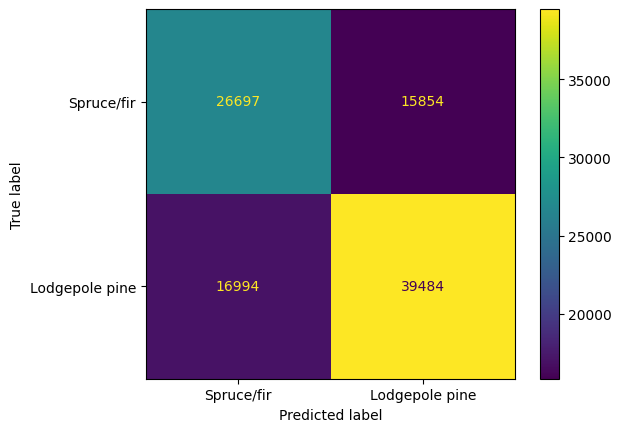


 Loss:


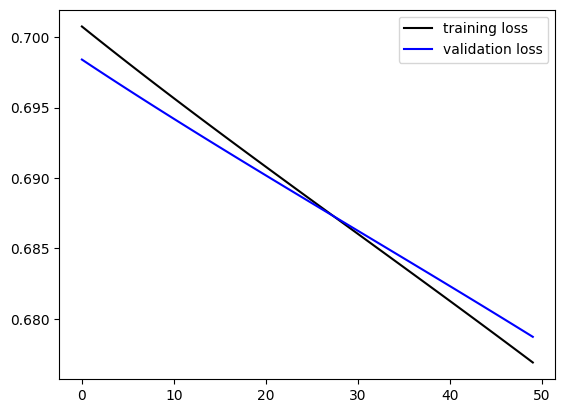

In [ ]:

# Create an instance of your network
feature_count = scaled_cov_type_feats_sub.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels_sub).shape[0]
three_layer_MLP_model = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 50
learning_rate = 0.00001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = CoverTypeDataset(scaled_cov_type_feats_sub[train_set_ids, :], 
                             cov_type_labels_sub[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CoverTypeDataset(scaled_cov_type_feats_sub[val_set_ids, :], 
                             cov_type_labels_sub[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = CoverTypeDataset(scaled_cov_type_feats_sub[test_set_ids, :], 
                             cov_type_labels_sub[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
MLP_model, losses = train_model(three_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
labels = ['Spruce/fir', 'Lodgepole pine']
evaluate_model(MLP_model, losses, test_dataloader, labels)




### **Exercise 1 - Exploring different numbers of epochs and/or learning rates**

You can try changing the values of the number of epochs and the learning rate, increasing or decreasing either (Hint: the learning rate should be between 0 and 1 and the number of epochs should be an integer).

### **Solution 1 (Baseline Solution)**

I increase my learning rate to 0.0001 and increase the number of epochs to 150.


RUNNING EXPERIMENT 2


 Batch size= 60

 Learning rate= 0.0001

 Number of epochs= 150

 Model=3-layer MLP

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.69205 train acc: 0.38 val loss: 0.69120 val acc: 0.51
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.68657 train acc: 0.47 val loss: 0.68575 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.68121 train acc: 0.53 val loss: 0.68043 val acc: 0.62
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.67585 train acc: 0.53 val loss: 0.67510 val acc: 0.65
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.67038 train acc: 0.62 val loss: 0.66970 val acc: 0.67
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.66474 train acc: 0.70 val loss: 0.66414 val acc: 0.68
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.65887 train acc: 0.68 val loss: 0.65838 val acc: 0.69
Foun

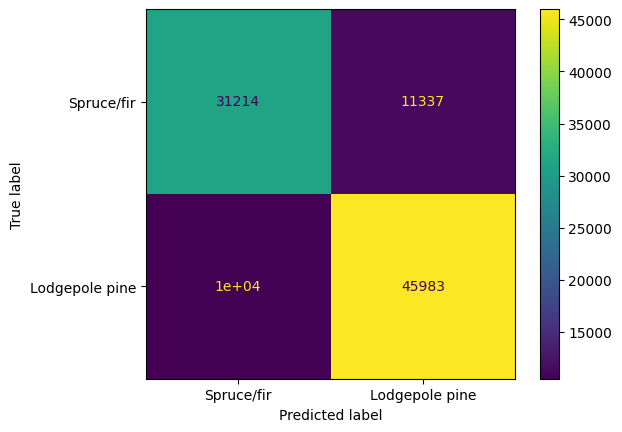


 Loss:


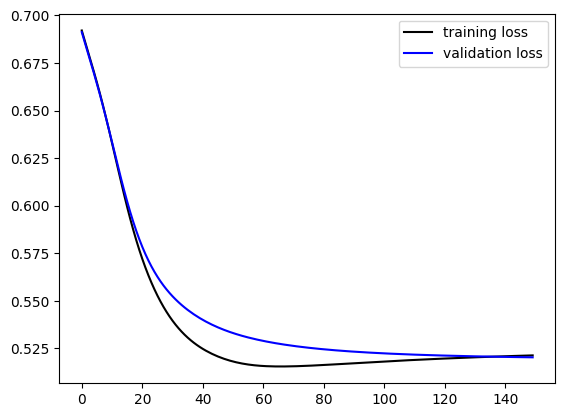

In [ ]:
# Set parameter values
num_epochs = 150
learning_rate = 0.0001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP\n')


# Create another instance of your network
feature_count = scaled_cov_type_feats_sub.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels_sub).shape[0]
three_layer_MLP_model_v2 = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)



# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = CoverTypeDataset(scaled_cov_type_feats_sub[train_set_ids, :], 
                             cov_type_labels_sub[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CoverTypeDataset(scaled_cov_type_feats_sub[val_set_ids, :], 
                             cov_type_labels_sub[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))

test_set = CoverTypeDataset(scaled_cov_type_feats_sub[test_set_ids, :], 
                             cov_type_labels_sub[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
three_layer_MLP_model_v2, losses_v2 = train_model(three_layer_MLP_model_v2, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_v2, losses_v2, test_dataloader, labels)



### **Exercise 2 - Using the unscaled features**

What do you think would be the outcome if you used unscaled features instead of scaled features for a neural network**?** You can try using the former to see what happens.

### **Solution 2**

RUNNING EXPERIMENT 3


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 150

 Model = 3-layer MLP with unscaled feature input

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.72912 train acc: 0.42 val loss: 0.68404 val acc: 0.49
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.73035 train acc: 0.42 val loss: 0.68301 val acc: 0.49
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.72666 train acc: 0.42 val loss: 0.68247 val acc: 0.50
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.71267 train acc: 0.60 val loss: 0.67975 val acc: 0.54
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.70109 train acc: 0.60 val loss: 0.65187 val acc: 0.58
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.64095 train acc: 0.55 val loss: 0.62730 val acc: 0.58
epoch: 6 - train loss: 0.60401 train acc: 0.55 val loss: 0.62933 val acc: 0.57
epoch: 7 - train loss:

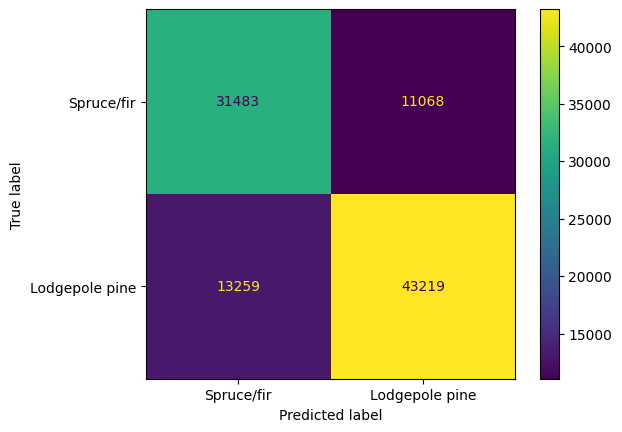


 Loss:


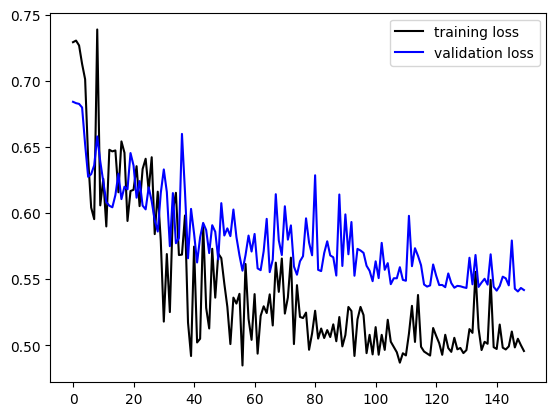

In [ ]:
# Set parameter values
num_epochs = 150
learning_rate = 0.0001
batch_size = 60

print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = 3-layer MLP with unscaled feature input\n')


# Create another instance of your network
feature_count = cov_type_feats_sub.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels_sub).shape[0]
three_layer_MLP_model_vUnscaled = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)



# Set up the data loading by batch
# With the test and validation sets having only one batch

unscaled_train_set = CoverTypeDataset(cov_type_feats_sub[train_set_ids, :], 
                             cov_type_labels_sub[train_set_ids])
unscaled_train_dataloader = DataLoader(unscaled_train_set, batch_size=batch_size)

unscaled_val_set = CoverTypeDataset(cov_type_feats_sub[val_set_ids, :], 
                             cov_type_labels_sub[val_set_ids])
unscaled_val_dataloader = DataLoader(unscaled_val_set, batch_size=len(val_set))

unscaled_test_set = CoverTypeDataset(cov_type_feats_sub[test_set_ids, :], 
                             cov_type_labels_sub[test_set_ids])
unscaled_test_dataloader = DataLoader(unscaled_test_set, batch_size=len(test_set))


# Train the model
three_layer_MLP_model_Unscaled, losses_vUnscaled = train_model(three_layer_MLP_model_vUnscaled, 
                                                                learning_rate, num_epochs, 
                                                                unscaled_train_dataloader, unscaled_val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_Unscaled, losses_vUnscaled, unscaled_test_dataloader, labels)



### **Exercise 3 - Trying a deeper model**


### **Solution 3 (Baseline Solution)**

CREATING A 10-LAYER MLP

In [ ]:
# Create your network class
class ten_layer_MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = torch.sigmoid):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.hidden_l3 = nn.Linear(hidden_layer_sizes[1], hidden_layer_sizes[2])
        self.hidden_l4 = nn.Linear(hidden_layer_sizes[2], hidden_layer_sizes[3])
        self.hidden_l5 = nn.Linear(hidden_layer_sizes[3], hidden_layer_sizes[4])
        self.hidden_l6 = nn.Linear(hidden_layer_sizes[4], hidden_layer_sizes[5])
        self.hidden_l7 = nn.Linear(hidden_layer_sizes[5], hidden_layer_sizes[6])
        self.hidden_l8 = nn.Linear(hidden_layer_sizes[6], hidden_layer_sizes[7])
        self.hidden_l9 = nn.Linear(hidden_layer_sizes[7], hidden_layer_sizes[8])
        self.output_l10 = nn.Linear(hidden_layer_sizes[8], output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.hidden_l1(inputs)
        x = self.hidden_l2(x)
        x = self.hidden_l3(x)
        x = self.hidden_l4(x)
        x = self.hidden_l5(x)
        x = self.hidden_l6(x)
        x = self.hidden_l7(x)
        x = self.hidden_l8(x)
        x = self.hidden_l9(x)
        x = self.output_l10(x)
        x = self.activation_fn(x)
        return x


RUNNING EXPERIMENT 4


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 150

 Model = 10-layer MLP

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.69306 train acc: 0.53 val loss: 0.69301 val acc: 0.56
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.69256 train acc: 0.55 val loss: 0.69233 val acc: 0.57
epoch: 2 - train loss: 0.69210 train acc: 0.55 val loss: 0.69169 val acc: 0.57
epoch: 3 - train loss: 0.69168 train acc: 0.55 val loss: 0.69110 val acc: 0.57
epoch: 4 - train loss: 0.69130 train acc: 0.55 val loss: 0.69055 val acc: 0.57
epoch: 5 - train loss: 0.69095 train acc: 0.55 val loss: 0.69004 val acc: 0.57
epoch: 6 - train loss: 0.69063 train acc: 0.55 val loss: 0.68956 val acc: 0.57
epoch: 7 - train loss: 0.69033 train acc: 0.55 val loss: 0.68912 val acc: 0.57
epoch: 8 - train loss: 0.69007 train acc: 0.55 val loss: 0.68871 val acc: 0.57
epoch: 9 - train loss: 0.68982 train acc: 0.55 val loss: 0.68832 val acc: 0.57
epoch: 10 - trai

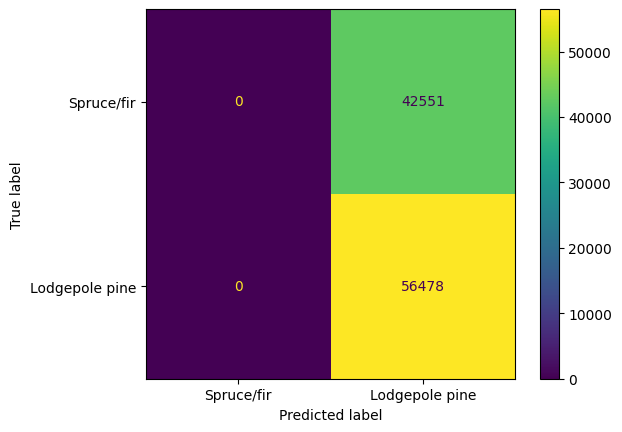


 Loss:


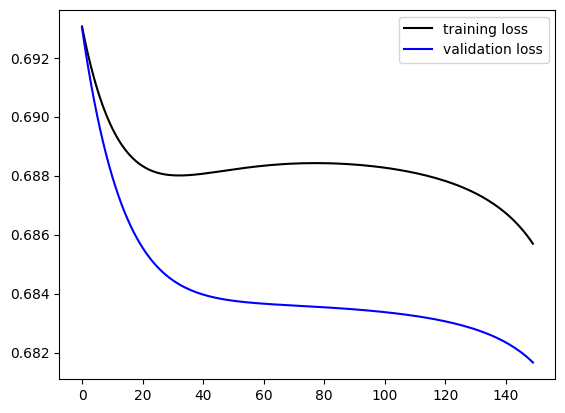

In [ ]:
# Set parameter values
num_epochs = 150
learning_rate = 0.0001


print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = 10-layer MLP\n')

# Create another instance of your network
feature_count = scaled_cov_type_feats_sub.shape[1]
hidden_layer_sizes = [50, 50, 50, 50, 50, 50, 50, 20, 20]
class_count = numpy.unique(cov_type_labels_sub).shape[0]
ten_layer_MLP_model = ten_layer_MLP(feature_count, hidden_layer_sizes, class_count)




# Train the model
ten_layer_model, losses_vTenLayer = train_model(ten_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(ten_layer_model, losses_vTenLayer, test_dataloader, labels)



## 6 - Modelling with Other Kinds of Neural Network Architectures



### **Exercise 4 - Building your custom NN**

Below, I use my understanding of the dataset (based on exploration, e.g. reading the information provided) to inform a new neural network architecture, i.e. different from the MLP.

### **Solution 4 (Baseline Solution)**

-- In exploring the dataset, I noticed that the 'distance to hydrology' information is given separately for the horizontal and vertical directions. I wondered if it would help the model to also have the combination of these two hydrology information. So, I compute a new feature 'Distance_to_Hydrology_Ratio' as the ratio of the Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology. This makes my feature set now `N x 55` instead of `N x 54`.

-- In addition, I noticed that 'Hillshade' information is given for 3 different timepoints: 9am, noon, and 3pm. I wondered if it is perhaps valuable to address the temporal relation between the 3 'Hillshade' features. So: 

1.   I restructure the feature vector such that instead of the new `N x 55` feature set, I have `N x 52` & `N x 3 x 1` feature sets where the '3' in the second feature set is a time dimension for which I can use LSTM layers.
2.   My model will thus have two input streams:
  *   an N x 52 input that goes into fully-connected layers (or a MLP); and
  *   an N x 3 x 1 input that goes into LSTM layers.
3. The (intermediate) outputs from the MLP and LSTM layers would then be concatenated and fed as input into other MLP layers. A diagrammatic illustration is provided below.

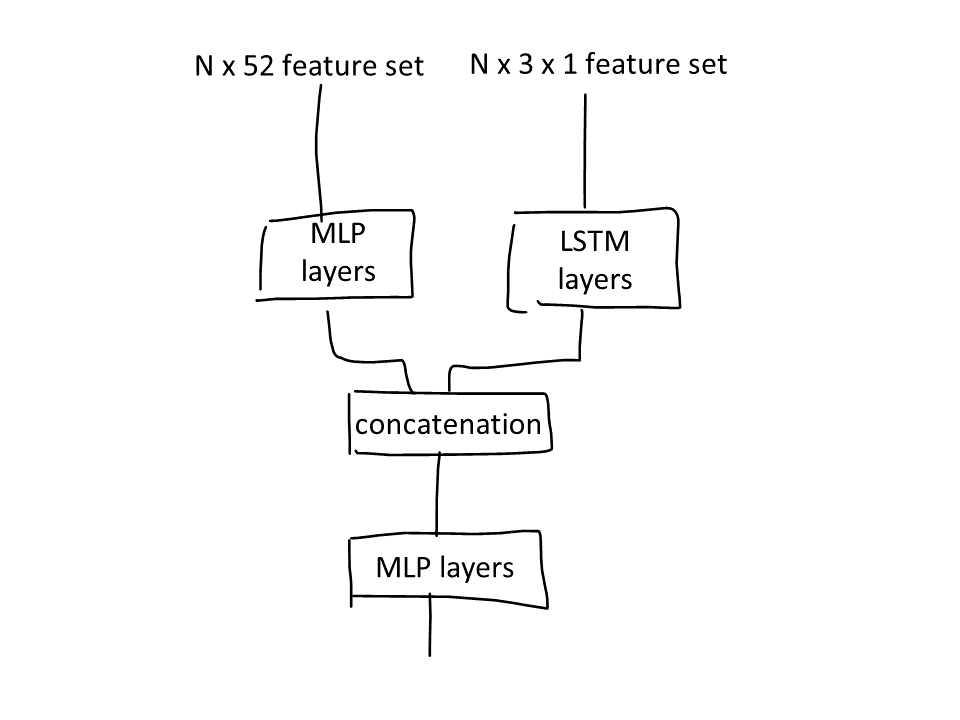




### **Solution 4 - Data preparation & Feature extraction**


In [ ]:
# A `Dataset' class for preparing the data
# including feature extraction and preprocessing
class NewCoverTypeDataset(Dataset):
    def __init__(self, unscaled_orig_feats, labels):
        feats = unscaled_orig_feats[:, :]

        # Computing the new 'Distance_to_Hydrology_Ratio' as the ratio of 
        # the Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology
        # features
        feat_len = feats.shape[0]
        epsilon = 0.01 # to avoid division by zero
        new_feat_col = numpy.reshape(feats[:, 4]/(feats[:, 3]+epsilon), (-1, 1))
        feats = numpy.concatenate([feats, new_feat_col], axis=1)
      
 

        # Scale the features
        scaled_feats = scale_feats(feats)

        # Split the feature set into the two different input streams
        in1 = numpy.concatenate([scaled_feats[:, :6], scaled_feats[:, 9:]], axis=1) 
        in2 = numpy.reshape(scaled_feats[:, 6:9], (-1, 3, 1))

        # Convert the features and labels from numpy arrays to PyTorch tensors
        self.feats1 = torch.tensor(in1, dtype=torch.float32)
        self.feats2 = torch.tensor(in2, dtype=torch.float32)

        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels - 1, dtype=torch.long)




    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        
        
        return (self.feats1[idx, :], self.feats2[idx, :, :]), self.labels[idx]

In [ ]:
batch_size = 60


# A `Dataset' class for preparing the data
# including feature extraction and preprocessing
class NewCoverTypeDataset(Dataset):
    def __init__(self, unscaled_orig_feats, labels):
        feats = unscaled_orig_feats[:, :]

        # Computing the new 'Distance_to_Hydrology_Ratio' as the ratio of 
        # the Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology
        # features
        feat_len = feats.shape[0]
        epsilon = 0.01 # to avoid division by zero
        new_feat_col = numpy.reshape(feats[:, 4]/(feats[:, 3]+epsilon), (-1, 1))
        feats = numpy.concatenate([feats, new_feat_col], axis=1)
      
 

        # Scale the features
        scaled_feats = scale_feats(feats)

        # Split the feature set into the two different input streams
        in1 = numpy.concatenate([scaled_feats[:, :6], scaled_feats[:, 9:]], axis=1) 
        in2 = numpy.reshape(scaled_feats[:, 6:9], (-1, 3, 1))

        # Convert the features and labels from numpy arrays to PyTorch tensors
        self.feats1 = torch.tensor(in1, dtype=torch.float32)
        self.feats2 = torch.tensor(in2, dtype=torch.float32)

        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels - 1, dtype=torch.long)




    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        
        
        return (self.feats1[idx, :], self.feats2[idx, :, :]), self.labels[idx]




# Set up the data loading by batch
# With the test and validation sets having only one batch

new_train_set = NewCoverTypeDataset(cov_type_feats_sub[train_set_ids, :], 
                             cov_type_labels_sub[train_set_ids])
new_train_dataloader = DataLoader(new_train_set, batch_size=batch_size)

new_val_set = NewCoverTypeDataset(cov_type_feats_sub[val_set_ids, :], 
                             cov_type_labels_sub[val_set_ids])
new_val_dataloader = DataLoader(new_val_set, batch_size=len(new_val_set))

new_test_set = NewCoverTypeDataset(cov_type_feats_sub[test_set_ids, :], 
                             cov_type_labels_sub[test_set_ids])
new_test_dataloader = DataLoader(new_test_set, batch_size=len(new_test_set))




 A peek at the scaled dataset features: 
[[-0.58460911  0.565174    0.08914337 ... -0.13033738 -0.10256235
   0.20049993]
 [-1.50157959 -0.93168143 -0.19719426 ... -0.13033738 -0.10256235
  -0.13646646]
 [ 0.24362229  1.63179553 -0.48353189 ... -0.13033738 -0.10256235
   0.82422142]
 ...
 [-0.29867208  0.07219766 -1.05620715 ... -0.13033738 -0.10256235
   0.36649941]
 [-0.12612387 -0.60004281  0.94815626 ... -0.13033738 -0.10256235
  -2.31173911]
 [-2.03401407 -1.24539365  0.66181863 ... -0.13033738 -0.10256235
  -0.32954557]]

 A peek at the scaled dataset features: 
[[ 1.30401086e-01  1.62152282e+00 -7.65094307e-01 ... -1.28351903e-01
  -1.01381717e-01 -1.01180854e+00]
 [ 1.24837987e+00  1.55896881e+00  2.37487946e-01 ... -1.28351903e-01
  -1.01381717e-01 -2.72539106e-01]
 [-9.22053085e-02 -9.87873016e-01 -6.21868271e-01 ... -1.28351903e-01
  -1.01381717e-01  2.64293275e-04]
 ...
 [ 1.10613851e-01  1.59471396e+00 -6.21868271e-01 ... -1.28351903e-01
  -1.01381717e-01 -1.19398637e+00]

### **Solution 4 - Creating the architecture**

In [ ]:
# Creating my parallel-input MLP-LSTMNN network class
class two_input_MLP_LSTMNN(nn.Module):
    def __init__(self,
                 input_size_in1,
                 input_size_in2,
                 hidden_layer_size_in1,
                 hidden_layer_size_in2,
                 shared_hidden_layer_sizes,
                 output_size):
        super().__init__()
        self.hidden_in1 = nn.Linear(input_size_in1, hidden_layer_size_in1)
        self.hidden_in2 = nn.LSTM(input_size_in2, hidden_layer_size_in2, 1, batch_first=True)
        self.lstmout_size = 3*hidden_layer_size_in2
        self.hidden_l1 = nn.Linear(hidden_layer_size_in1+self.lstmout_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        




        
    def forward(self, inputs):
        x1 = self.hidden_in1(inputs[0])
        x2 = self.hidden_in2(inputs[1])
        # Notice that I use a tanh activation below
        # for the LSTM layers
        x2 = torch.tanh(x2[0])
        x2 = torch.reshape(x2, (-1, self.lstmout_size))

        x = torch.concat((x1, x2), dim=1)
    
        x = self.hidden_l1(x)
        x = self.hidden_l2(x)
        x = self.output_l3(x)
        x = torch.sigmoid(x)
        return x

### **Solution 4 - Evaluating the model**

RUNNING EXPERIMENT 5


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 70

 Model = My proposed model

Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.69077 train acc: 0.53 val loss: 0.68858 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.68857 train acc: 0.53 val loss: 0.68637 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.68634 train acc: 0.53 val loss: 0.68413 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.68404 train acc: 0.50 val loss: 0.68182 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.68162 train acc: 0.50 val loss: 0.67940 val acc: 0.60
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.67903 train acc: 0.50 val loss: 0.67682 val acc: 0.61
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.67621 train acc: 0.55 val loss: 0.67403 val acc:

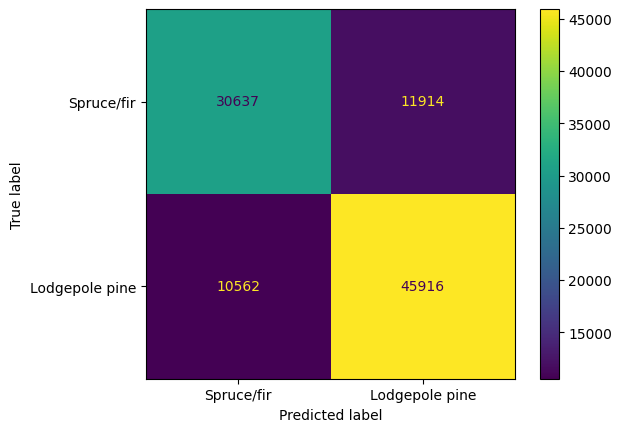


 Loss:


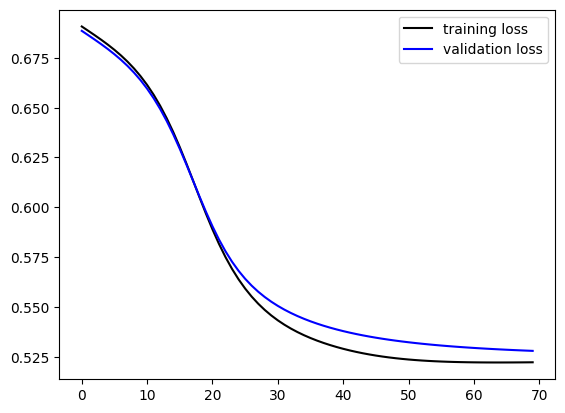

In [ ]:
# Set parameter values
num_epochs = 70
learning_rate = 0.0001


print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = My proposed model\n')


# Create an instance of the network
feat1_count = 52
feat2_count = 1
hidden_layer_sizes = [50, 20]
class_count = 2
my_proposed_model = two_input_MLP_LSTMNN(feat1_count, feat2_count,
                 100, 10, hidden_layer_sizes,
                 class_count)



# Train the model
my_proposed_model, losses_vNewModel = train_model(my_proposed_model, learning_rate, num_epochs, new_train_dataloader, new_val_dataloader)

# Evaluate the trained model
evaluate_model(my_proposed_model, losses_vNewModel, new_test_dataloader, labels)



## 7 - Comparing with Random Forest




### **Exercise 5 - Building a Random Forest Model**

We can build additional models using the Random Forest classifier. You can find the documentations in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for the *scikit learn* library. 

### **Solution 5 - Baseline Solution**

RUNNING EXPERIMENT 6


 Building a forest of 10 trees...

 Building a forest of 100 trees...

 Building a forest of 1000 trees...

 Model = Random Forest with 1000 trees

 test f1 score: 0.96 | test accuracy: 0.96

 The F1 scores for each of the classes are: [0.95649067 0.96798394]

 Confusion matrix:


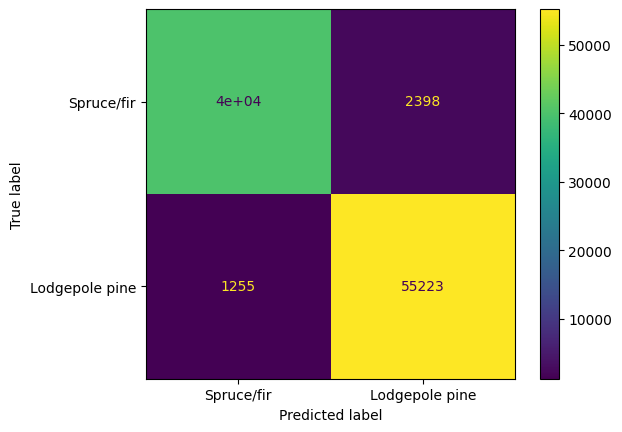

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the validation set to optimize the hyperparameters you wish to
num_trees_options = [10, 100, 1000]
best_num_trees = 1
best_num_trees_perf = 0
val_labels = cov_type_labels_sub[val_set_ids]
train_labels = cov_type_labels_sub[train_set_ids];

for num_trees in num_trees_options:
  print("\n Building a forest of "+str(num_trees)+" trees...")
  rf_model = RandomForestClassifier(n_estimators=num_trees, random_state=random_seed)
  rf_model.fit(scaled_cov_type_feats_sub[train_set_ids, :], train_labels)
  val_pred = rf_model.predict(scaled_cov_type_feats_sub[val_set_ids, :])

  avg_f1_score_log = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score_log > best_num_trees_perf:
    best_num_trees = num_trees
    best_num_trees_perf = avg_f1_score_log


# Use the optimized hyperparameter to train the final model
rf_model = RandomForestClassifier(n_estimators=best_num_trees, random_state=random_seed)
rf_model.fit(scaled_cov_type_feats_sub[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = cov_type_labels_sub[test_set_ids]
test_pred = rf_model.predict(scaled_cov_type_feats_sub[test_set_ids, :])
test_avg_f1_score = f1_score(test_labels, test_pred, average='macro')
test_accuracy = accuracy_score(test_labels, test_pred)

print('\n Model = Random Forest with {:2d} trees'.format(best_num_trees))

print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
test_f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


print("\n Confusion matrix:")
confusion_mat = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=labels)
disp.plot()
plt.show()


## 8 - Comparison with previous work - Optional

You can compare your results with those obtained in this research publication:



> Blackard, Jock A., and Denis J. Dean. "Comparative accuracies of artificial neural networks and discriminant analysis in predicting forest cover types from cartographic variables." Computers and electronics in agriculture 24, no. 3 (1999): 131-151. https://doi.org/10.1016/S0168-1699(99)00046-0



You would need to first run your models on the full dataset, rather than only the subset with labels '1' and '2', i.e. in Section 3, you need to make `cov_type_labels_sub = cov_type_labels` and `cov_type_feats_sub = cov_type_feats`:

```
##Let's now consider data with class labels '1' to '7'
#all_ids = numpy.arange(0, cov_type_feats.shape[0])
#sub_ids = all_ids[cov_type_labels<3]
cov_type_labels_sub = cov_type_labels
cov_type_feats_sub = cov_type_feats
```



**NB**: You can show the results in a table. Be sure to highlight any differences in data (sub)sets or validation methods that could make direct comparison unfair between the results reported in the paper and your own results.


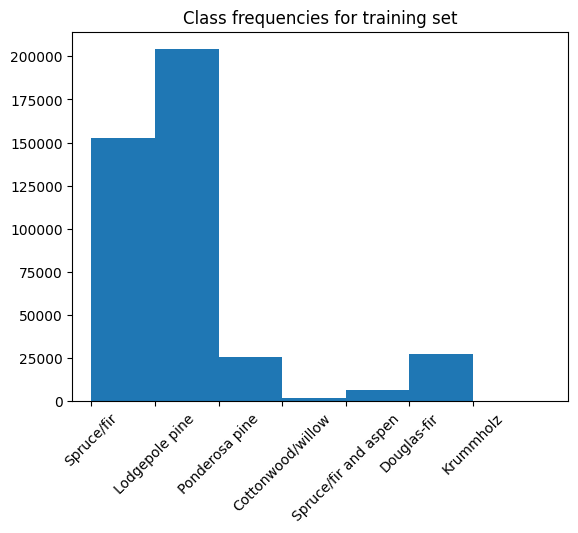

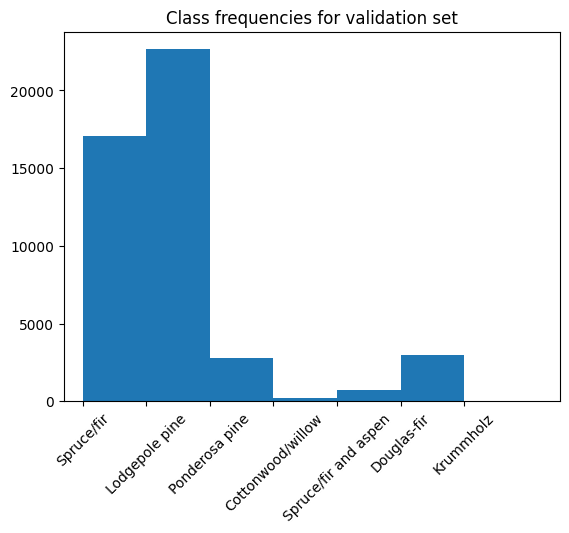

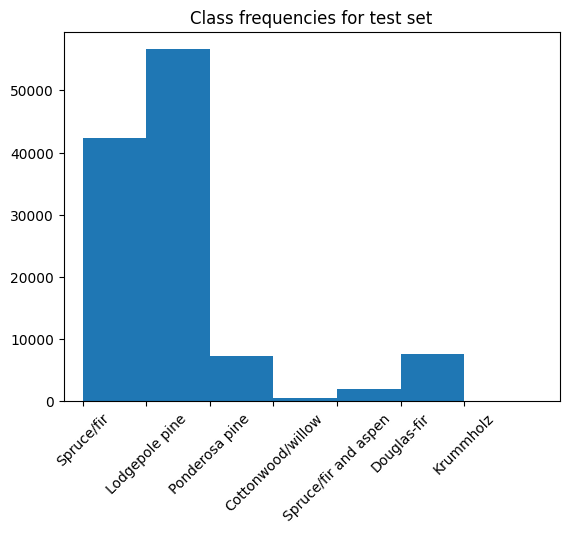

In [ ]:
from sklearn.model_selection import train_test_split
# Let's consider the full dataset
all_ids = numpy.arange(0, cov_type_feats.shape[0])

# First randomly split the data 80/20 into training and test sets
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.2, train_size=0.8, 
                                 random_state=random_seed, shuffle=True)


# Then further split the training set into training and validation sets
train_set_ids, val_set_ids = train_test_split(train_set_ids, test_size=0.1, train_size=0.9, 
                                 random_state=random_seed, shuffle=True)



# Show the distribution of the labels in the final training, validation, and test sets
cover_type_distr_plot(cov_type_labels[train_set_ids], 'Class frequencies for training set')
cover_type_distr_plot(cov_type_labels[val_set_ids], 'Class frequencies for validation set')
cover_type_distr_plot(cov_type_labels[test_set_ids], 'Class frequencies for test set')

In [ ]:
from sklearn.preprocessing import StandardScaler
def scale_feats(feat_vec):
  # Scaling the features to the same range of values
  scaler = StandardScaler()
  scaler.fit(feat_vec)
  scaled_feat_vec = scaler.transform(feat_vec)
  print("\n A peek at the scaled dataset features: \n"+str(scaled_feat_vec))

  return scaled_feat_vec

In [ ]:
scaled_cov_type_feats = scale_feats(cov_type_feats)


 A peek at the scaled dataset features: 
[[-1.29780509 -0.93515698 -1.48281978 ... -0.16595612 -0.15601398
  -0.12365355]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.16595612 -0.15601398
  -0.12365355]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.16595612 -0.15601398
  -0.12365355]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05498988  0.12816306  0.11969395 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05856151  0.08348575 -0.14739167 ... -0.16595612 -0.15601398
  -0.12365355]]


In [ ]:
def evaluate_model1(model, losses, test_dataloader, label_list):

  # Finally we can test our model on the test set and get an estimate of its performance. 
  # First set the model to evaluation mode 
  model.eval()  
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)    
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    test_f1_scores = f1_score(y_test, numpy.argmax(test_pred_numpy, axis=1), average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


    print("\n Confusion matrix:")
    fig, ax = plt.subplots(figsize=(6,6))
    confusion_mat = confusion_matrix(y_test, numpy.argmax(test_pred_numpy, axis=1))
    disp = ConfusionMatrixDisplay(confusion_mat, display_labels=label_list)
    disp.plot(ax = ax)
    ax.set_xticklabels(label_list, rotation=30, horizontalalignment='right')
    ax.set_title("Confusion Matrix")
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = numpy.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss') 
    ax.plot(losses[:, 1], 'b-', label='validation loss') 
    plt.legend(loc='upper right')


 Batch size= 60

 Learning rate= 1e-05

 Number of epochs= 50

 Model=3-layer MLP
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.91763 train acc: 0.12 val loss: 1.92941 val acc: 0.24
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.91508 train acc: 0.38 val loss: 1.92669 val acc: 0.27
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.91254 train acc: 0.38 val loss: 1.92398 val acc: 0.31
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.91001 train acc: 0.38 val loss: 1.92128 val acc: 0.34
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.90748 train acc: 0.38 val loss: 1.91858 val acc: 0.38
Found improvement in performance. New model saved.
epoch: 5 - train loss: 1.90496 train acc: 0.38 val loss: 1.91588 val acc: 0.40
Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.90244 train acc: 0.38 val loss: 1.91319 val acc: 0.43
Found i

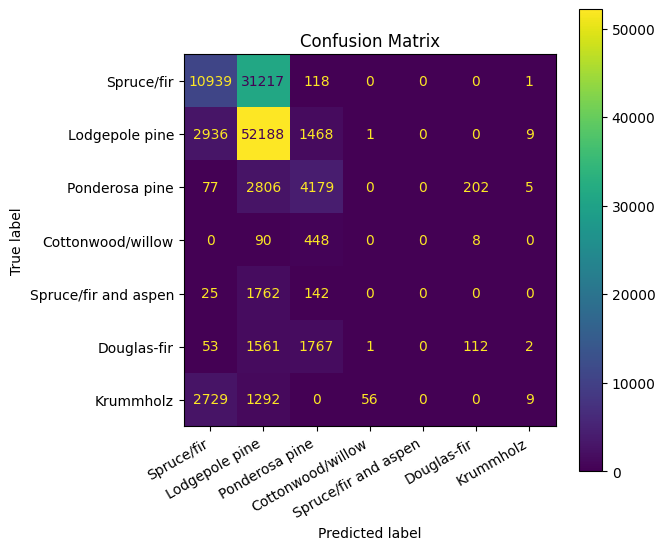


 Loss:


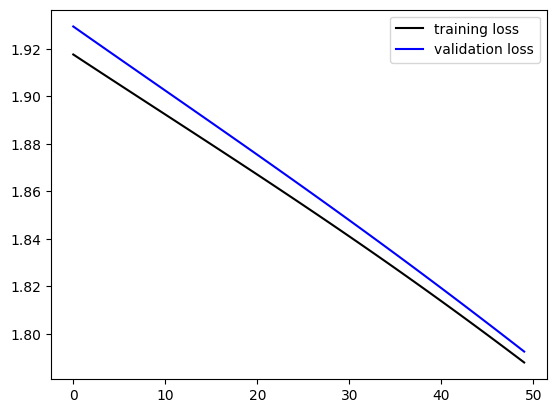

In [ ]:
# Create an instance of your network
feature_count = scaled_cov_type_feats.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels).shape[0]
three_layer_MLP_model = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 50
learning_rate = 0.00001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = CoverTypeDataset(scaled_cov_type_feats[train_set_ids, :], 
                             cov_type_labels[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CoverTypeDataset(scaled_cov_type_feats[val_set_ids, :], 
                             cov_type_labels[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = CoverTypeDataset(scaled_cov_type_feats[test_set_ids, :], 
                             cov_type_labels[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
MLP_model, losses = train_model(three_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model1(MLP_model, losses, test_dataloader, cover_types)


 Batch size= 60

 Learning rate= 0.0001

 Number of epochs= 150

 Model=3-layer MLP
Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.93700 train acc: 0.12 val loss: 1.92229 val acc: 0.30
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.90914 train acc: 0.38 val loss: 1.89156 val acc: 0.50
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.88001 train acc: 0.75 val loss: 1.85966 val acc: 0.55
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.84920 train acc: 0.62 val loss: 1.82622 val acc: 0.57
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.81668 train acc: 0.62 val loss: 1.79125 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 5 - train loss: 1.78292 train acc: 0.62 val loss: 1.75522 val acc: 0.59
Found improvement in performance. New model saved.
epoch: 6 - train loss: 1.74894 train acc: 0.62 val loss: 1.71904 val acc: 0.59
Found

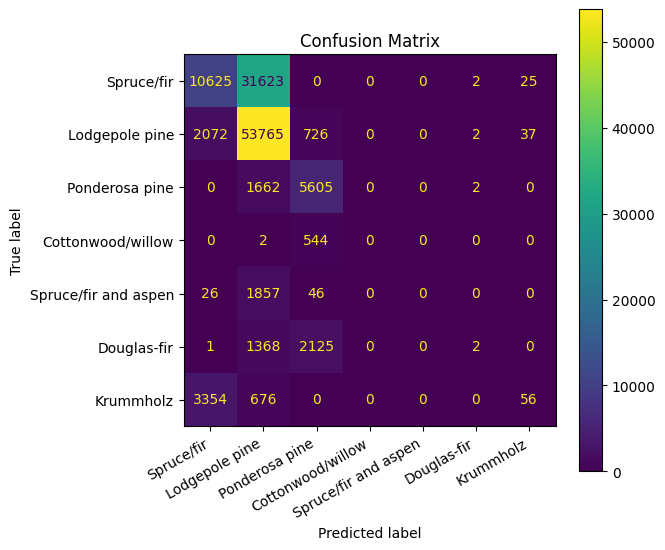


 Loss:


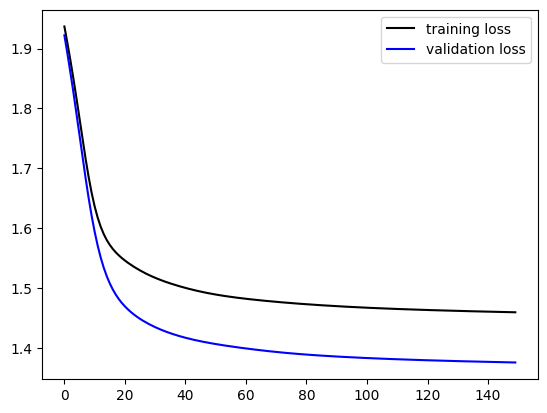

In [ ]:
# Create an instance of your network
feature_count = scaled_cov_type_feats.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels).shape[0]
three_layer_MLP_model = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 150
learning_rate = 0.0001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = CoverTypeDataset(scaled_cov_type_feats[train_set_ids, :], 
                             cov_type_labels[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CoverTypeDataset(scaled_cov_type_feats[val_set_ids, :], 
                             cov_type_labels[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = CoverTypeDataset(scaled_cov_type_feats[test_set_ids, :], 
                             cov_type_labels[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
MLP_model, losses = train_model(three_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model1(MLP_model, losses, test_dataloader, cover_types)


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 150

 Model = 3-layer MLP with unscaled feature input

Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 1 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 2 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 3 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 4 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 5 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 6 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 7 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 8 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 9 - train loss: 1.91542 train acc: 0.25 val loss: 1.79820 val acc: 0.37
epoch: 10 - train loss: 1.91542 train ac

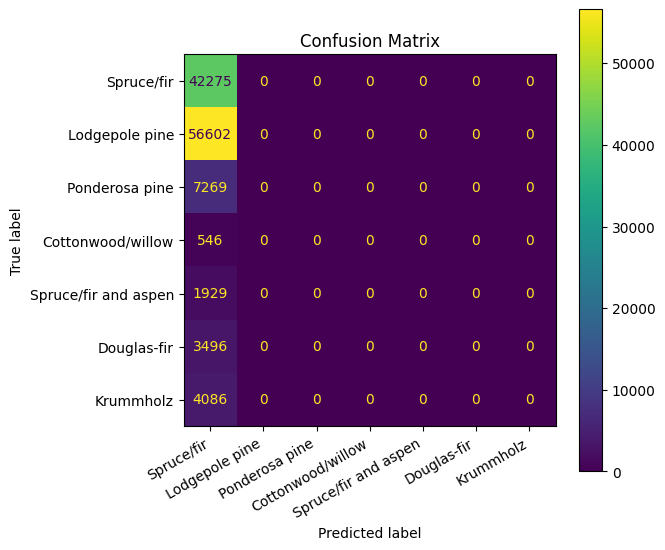


 Loss:


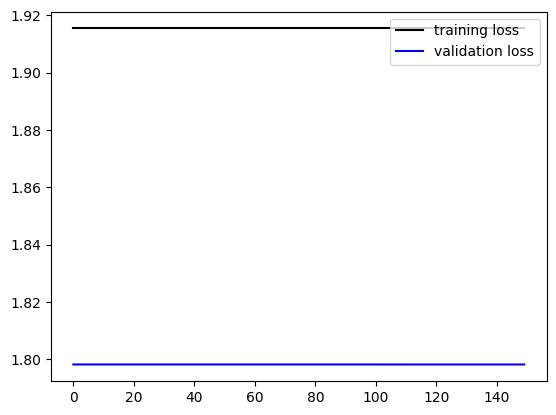

In [ ]:
# Using unscaled features set
# Set parameter values
num_epochs = 150
learning_rate = 0.0001
batch_size = 60

print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = 3-layer MLP with unscaled feature input\n')


# Create another instance of your network
feature_count = cov_type_feats.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(cov_type_labels).shape[0]
three_layer_MLP_model_Unscaled = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)



# Set up the data loading by batch
# With the test and validation sets having only one batch

unscaled_train_set = CoverTypeDataset(cov_type_feats[train_set_ids, :], 
                             cov_type_labels[train_set_ids])
unscaled_train_dataloader = DataLoader(unscaled_train_set, batch_size=batch_size)

unscaled_val_set = CoverTypeDataset(cov_type_feats[val_set_ids, :], 
                             cov_type_labels[val_set_ids])
unscaled_val_dataloader = DataLoader(unscaled_val_set, batch_size=len(unscaled_val_set))

unscaled_test_set = CoverTypeDataset(cov_type_feats[test_set_ids, :], 
                             cov_type_labels[test_set_ids])
unscaled_test_dataloader = DataLoader(unscaled_test_set, batch_size=len(unscaled_test_set))


# Train the model
three_layer_MLP_model_Unscaled_fullset, losses_Unscaled = train_model(three_layer_MLP_model_Unscaled, 
                                                                learning_rate, num_epochs, 
                                                                unscaled_train_dataloader, unscaled_val_dataloader)

# Evaluate the trained model
evaluate_model1(three_layer_MLP_model_Unscaled_fullset, losses_Unscaled, unscaled_test_dataloader, cover_types)


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 150

 Model = 10-layer MLP

Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.94503 train acc: 0.25 val loss: 1.92844 val acc: 0.36
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.93449 train acc: 0.25 val loss: 1.91189 val acc: 0.37
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.92410 train acc: 0.25 val loss: 1.89538 val acc: 0.37
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.91369 train acc: 0.38 val loss: 1.87868 val acc: 0.48
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.90316 train acc: 0.38 val loss: 1.86159 val acc: 0.49
epoch: 5 - train loss: 1.89238 train acc: 0.38 val loss: 1.84391 val acc: 0.49
epoch: 6 - train loss: 1.88125 train acc: 0.38 val loss: 1.82545 val acc: 0.49
epoch: 7 - train loss: 1.86969 train acc: 0.38 val loss: 1.80606 val acc: 0.49
epoch: 8 - train loss

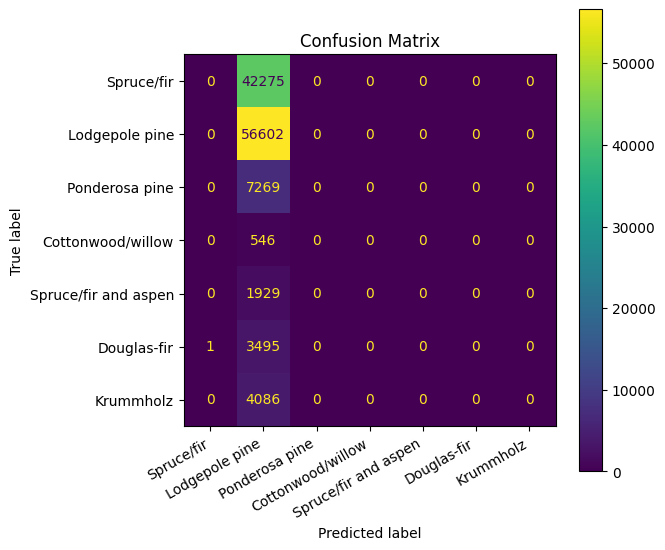


 Loss:


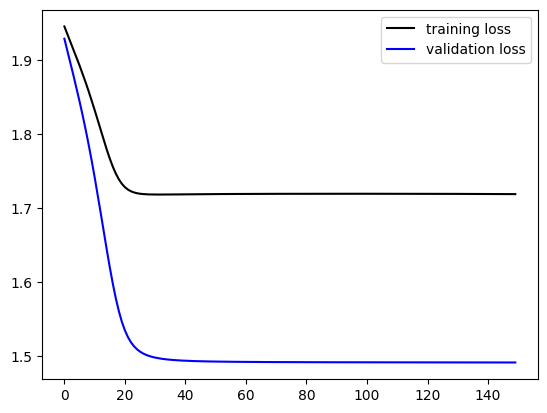

In [ ]:
# 10 layer MLP
# Set parameter values
num_epochs = 150
learning_rate = 0.0001


print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = 10-layer MLP\n')

train_set = CoverTypeDataset(scaled_cov_type_feats[train_set_ids, :], 
                             cov_type_labels[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = CoverTypeDataset(scaled_cov_type_feats[val_set_ids, :], 
                             cov_type_labels[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = CoverTypeDataset(scaled_cov_type_feats[test_set_ids, :], 
                             cov_type_labels[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))

# Create another instance of your network
feature_count = scaled_cov_type_feats.shape[1]
hidden_layer_sizes = [50, 50, 50, 50, 50, 50, 50, 20, 20]
class_count = numpy.unique(cov_type_labels).shape[0]
ten_layer_MLP_model_full = ten_layer_MLP(feature_count, hidden_layer_sizes, class_count)




# Train the model
ten_layer_model_fullset, losses_TenLayer = train_model(ten_layer_MLP_model_full, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model1(ten_layer_model_fullset, losses_TenLayer, test_dataloader, cover_types)

## Feature Extraction for Building custom NN

In [ ]:
batch_size = 60
# Set up the data loading by batch
# With the test and validation sets having only one batch

new_train_set_v2 = NewCoverTypeDataset(cov_type_feats[train_set_ids, :], 
                             cov_type_labels[train_set_ids])
new_train_dataloader_v2 = DataLoader(new_train_set_v2, batch_size=batch_size)

new_val_set_v2 = NewCoverTypeDataset(cov_type_feats[val_set_ids, :], 
                             cov_type_labels[val_set_ids])
new_val_dataloader_v2 = DataLoader(new_val_set_v2, batch_size=len(new_val_set_v2))

new_test_set_v2 = NewCoverTypeDataset(cov_type_feats[test_set_ids, :], 
                             cov_type_labels[test_set_ids])
new_test_dataloader_v2 = DataLoader(new_test_set_v2, batch_size=len(new_test_set_v2))


 A peek at the scaled dataset features: 
[[-1.17803589  1.54856524  1.3213835  ... -0.15663741 -0.12374329
   0.35780723]
 [ 0.15119346  0.1007135  -0.68100001 ... -0.15663741 -0.12374329
  -1.25757848]
 [-1.36384214 -0.80195949 -0.54750777 ... -0.15663741 -0.12374329
  -0.12110501]
 ...
 [-0.23113863  1.57537731 -0.14703107 ... -0.15663741 -0.12374329
   0.70894942]
 [-0.10964993  1.72731237 -0.81449224 ... -0.15663741 -0.12374329
  -0.236539  ]
 [ 0.12618108 -1.07008018 -0.2805233  ... -0.15663741 -0.12374329
  -0.20428452]]

 A peek at the scaled dataset features: 
[[ 0.43972029 -0.35007755  0.65530651 ... -0.15150695 -0.12266335
   0.29071775]
 [-0.40827346 -0.403655   -0.01394337 ... -0.15150695 -0.12266335
   0.24242588]
 [ 0.81541373 -0.83227462 -0.28164331 ... -0.15150695 -0.12266335
  -1.32416241]
 ...
 [-1.12745804 -0.67154226  0.11990661 ... -0.15150695 -0.12266335
   0.4683106 ]
 [ 0.41467406  0.74826023 -0.54934326 ... -0.15150695 -0.12266335
  -0.39057801]
 [ 0.74385308 


 Batch size = 60

 Learning rate = 0.0001

 Number of epochs = 70

 Model = My proposed model

Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.93186 train acc: 0.25 val loss: 1.93150 val acc: 0.21
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.91833 train acc: 0.25 val loss: 1.91220 val acc: 0.36
Found improvement in performance. New model saved.
epoch: 2 - train loss: 1.90483 train acc: 0.25 val loss: 1.89283 val acc: 0.49
Found improvement in performance. New model saved.
epoch: 3 - train loss: 1.89108 train acc: 0.50 val loss: 1.87301 val acc: 0.52
Found improvement in performance. New model saved.
epoch: 4 - train loss: 1.87678 train acc: 0.38 val loss: 1.85235 val acc: 0.54
epoch: 5 - train loss: 1.86168 train acc: 0.38 val loss: 1.83051 val acc: 0.53
epoch: 6 - train loss: 1.84552 train acc: 0.38 val loss: 1.80720 val acc: 0.53
epoch: 7 - train loss: 1.82809 train acc: 0.38 val loss: 1.78223 val acc: 0.52
epoch: 8 - train 

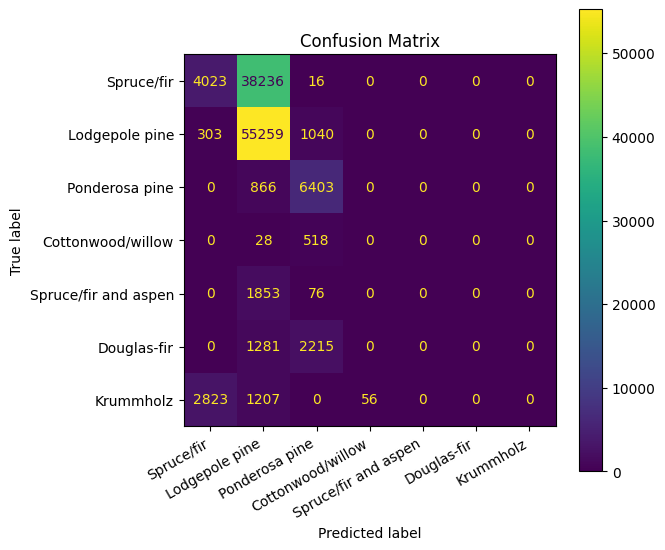


 Loss:


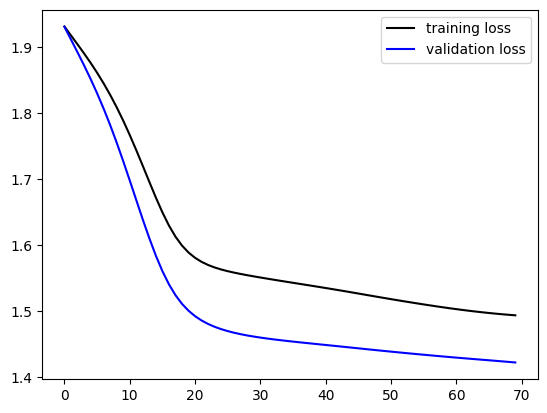

In [ ]:
# Set parameter values
num_epochs = 70
learning_rate = 0.0001


print('\n Batch size =', str(batch_size))
print('\n Learning rate =', str(learning_rate))
print('\n Number of epochs =', str(num_epochs))
print('\n Model = My proposed model\n')


# Create an instance of the network
feat1_count = 52
feat2_count = 1
hidden_layer_sizes = [50, 20]
class_count = 7
my_proposed_model_v2 = two_input_MLP_LSTMNN(feat1_count, feat2_count,
                 100, 10, hidden_layer_sizes,
                 class_count)



# Train the model
my_proposed_model_, losses_NewModel_v2 = train_model(my_proposed_model_v2, learning_rate, num_epochs, new_train_dataloader_v2, new_val_dataloader_v2)

# Evaluate the trained model
evaluate_model1(my_proposed_model_, losses_NewModel_v2, new_test_dataloader_v2, cover_types)

## Random Forest Classifier for full dataset


 Building a forest of 10 trees...

 Building a forest of 20 trees...

 Building a forest of 50 trees...

 Building a forest of 100 trees...

 Model = Random Forest with 100 trees

 test f1 score: 0.92 | test accuracy: 0.95

 The F1 scores for each of the classes are: [0.95378588 0.96090537 0.94878231 0.89181562 0.84029765 0.91366696
 0.95794974]

 Confusion matrix:


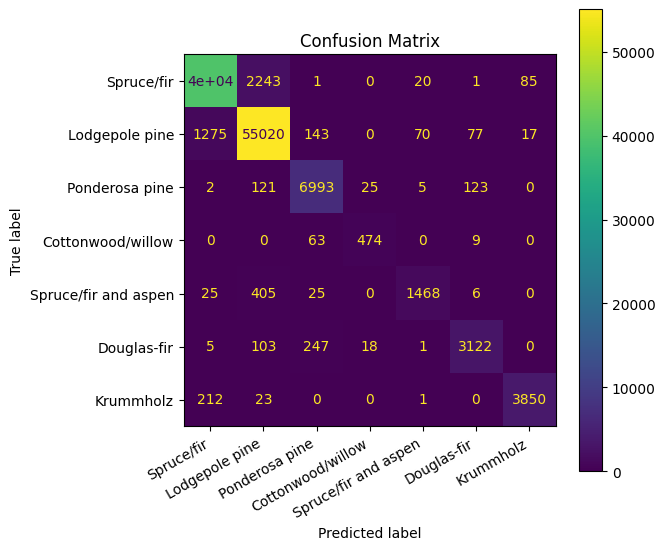

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the validation set to optimize the hyperparameters you wish to
num_trees_options = [10, 20, 50, 100]
best_num_trees = 1
best_num_trees_perf = 0
val_labels = cov_type_labels[val_set_ids]
train_labels = cov_type_labels[train_set_ids]

for num_trees in num_trees_options:
  print("\n Building a forest of "+str(num_trees)+" trees...")
  rf_model = RandomForestClassifier(n_estimators=num_trees, random_state=random_seed)
  rf_model.fit(scaled_cov_type_feats[train_set_ids, :], train_labels)
  val_pred = rf_model.predict(scaled_cov_type_feats[val_set_ids, :])

  avg_f1_score_log = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score_log > best_num_trees_perf:
    best_num_trees = num_trees
    best_num_trees_perf = avg_f1_score_log


# Use the optimized hyperparameter to train the final model
rf_model = RandomForestClassifier(n_estimators=best_num_trees, random_state=random_seed)
rf_model.fit(scaled_cov_type_feats[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = cov_type_labels[test_set_ids]
test_pred = rf_model.predict(scaled_cov_type_feats[test_set_ids, :])
test_avg_f1_score = f1_score(test_labels, test_pred, average='macro')
test_accuracy = accuracy_score(test_labels, test_pred)

print('\n Model = Random Forest with {:2d} trees'.format(best_num_trees))

print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
test_f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


print("\n Confusion matrix:")
fig, ax = plt.subplots(figsize=(6,6))
confusion_mat = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=cover_types)
disp.plot(ax = ax)
ax.set_xticklabels(cover_types, rotation=30, horizontalalignment='right')
ax.set_title("Confusion Matrix")
plt.show()

# Results 

* I got highest accuracy (0.95) and f1 score (0.92) for the full dataset by using `RandomForest Classifier` while three layer MLP neural network has accuracy (0.60) and f1 score (0.26) with epochs 150, batch size 60 and learning rate 0.0001. Combined neural network MLP and LSTM give the accuracy (0.57) and f1 score (0.23) with epochs 70, batch size 60 and learning rate 0.0001.
* By considering only two covertype `Spruce/fir` and `Lodgepole pine` accuracy (0.96) and f1 score (0.96) is higher by `RandomForest Classifier`